In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
class ChiSquareTest:
    def __init__(self, df):
        self.df = df

    def test_independence(self):
        results = []

        # 빈도 표 작성
        crosstab = pd.crosstab(self.df['group'], self.df['value'])
        
        # 기대 빈도 계산
        chi2_stat, p_val, dof, expected = stats.chi2_contingency(crosstab)

        # 기대 빈도가 5 미만인 셀 확인
        if np.any(expected < 5):
            # 기대 빈도가 5 미만인 경우 피셔의 정확 검정 사용
            results.append(expected)
            if crosstab.shape == (2, 2):  # 피셔의 정확 검정은 2x2 표에서만 사용 가능
                fisher_stat, fisher_p = stats.fisher_exact(crosstab)
                results.append(f"----------\nPrior Test - f<5 in at least one cell\nResult (Fisher's Exact Test) - p-value: {fisher_p:.4f}")
            else:
                results.append("Fisher's Exact Test is not applicable for tables larger than 2x2.")
        else:
            # 기대 빈도가 모두 5 이상인 경우 카이제곱 검정 사용
            results.append(expected)
            results.append(f"----------\nPrior Test - f>=5 in all cells\nResult (Chi-Square Test) - Chi2 Statistic: {chi2_stat:.4f}, p-value: {p_val:.4f}")
        
        return results

    def bar_plot(self, title=None):
        # group 컬럼이 존재하는지 확인
        if 'group' in self.df.columns:
            # 막대 그래프
            fig, ax = plt.subplots(figsize=(8, 6))
            sns.countplot(x='group', hue='value', data=self.df, ax=ax)
        else:
            raise ValueError("The dataframe must contain a 'group' column.")
        
        # 제목
        if title:
            plt.title(title)
        
        plt.show()

[[7.93333333 6.06666667]
 [9.06666667 6.93333333]]
----------
Prior Test - f>=5 in all cells
Result (Chi-Square Test) - Chi2 Statistic: 0.1024, p-value: 0.7489


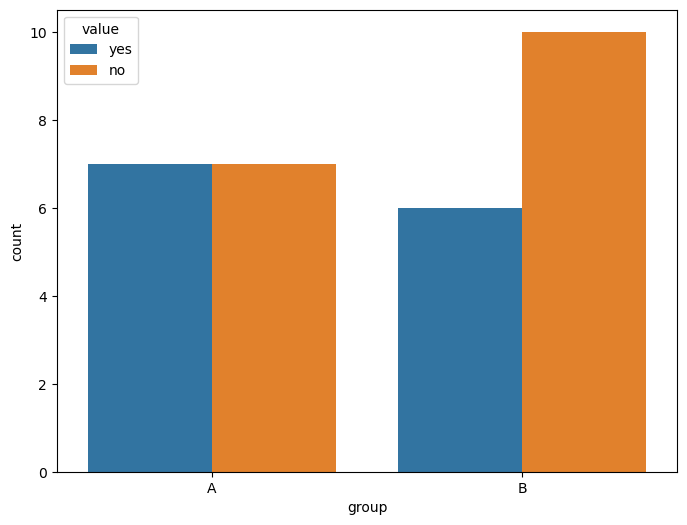

In [11]:
# 예시 데이터
data = {
    'group': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
    'value': ['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data)

chi_square_test = ChiSquareTest(df)
results = chi_square_test.test_independence()
for result in results:
    print(result)

chi_square_test.bar_plot()